Notebook run using Python 3.13.5, PyTorch 2.8.0

# Data Exploration

In [1]:
# Check your system specs
import sys
print("Python version:", sys.version)

## IF APPLICABLE (GPU available)
# import torch
# # Check your torch version and CUDA availability
# print("Torch version:", torch.__version__)
# print("CUDA available:", torch.cuda.is_available())
# print("CUDA runtime:", torch.version.cuda)
# if torch.cuda.is_available():
#     print("GPU:", torch.cuda.get_device_name(0))

Python version: 3.13.7 | packaged by conda-forge | (main, Sep  3 2025, 14:30:35) [GCC 14.3.0]


## Import data

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "US_Accidents_March23.csv"

# Load the latest version
df_orig = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sobhanmoosavi/us-accidents",
  file_path
)
print("pandas df loaded")

pandas df loaded


In [3]:
# Load dataset to local copy for working and easy re-initialization
df = df_orig.copy()
print("First 5 records:")
df.head()

First 5 records:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## Visualize data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


### Principle Component Analysis

#### Drop all non numeric columns in order to perform PCA

In [6]:
df_numeric = df.select_dtypes(include=['number'])

print("Numeric columns in df:")
df_numeric.columns

Numeric columns in df:


Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

#### Understand and clean missing numeric values in numeric df

In [7]:
# Lets check the NaN values in our remaining numeric df
na_counts = df_numeric.isna().sum()
print(na_counts)

# As we see from the print statement, some columns have a ton of missing values... maybe this is an intentional data design...
# 'Precipitation' column has a lot of NaN values, lets understand why
print()
print("Number of present 'Precipitation' values:", df_numeric['Precipitation(in)'].notna().sum())
print("Number of missing 'Precipitation' values:", df_numeric['Precipitation(in)'].isna().sum())
print("Number of unique 'Precipitation' values:", df_numeric['Precipitation(in)'].nunique())

print()
print("Number of unique 'Humidity' values:", df_numeric['Humidity(%)'].nunique())

# Visualize some of these NaN rows
df_filtered = df_numeric[df_numeric['Precipitation(in)'].isna()]
df_filtered.head(10)


Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402762
End_Lng              3402762
Distance(mi)               0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
dtype: int64

Number of present 'Precipitation' values: 5524808
Number of missing 'Precipitation' values: 2203586
Number of unique 'Precipitation' values: 299

Number of unique 'Humidity' values: 100


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
2,2,39.063148,-84.032608,NaN,NaN,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN
6,2,39.758274,-84.230507,NaN,NaN,0.00,34.0,31.0,100.0,29.66,7.0,3.5,NaN
7,3,39.770382,-84.194901,NaN,NaN,0.01,34.0,31.0,100.0,29.66,7.0,3.5,NaN
8,2,39.778061,-84.172005,NaN,NaN,0.00,33.3,NaN,99.0,29.67,5.0,1.2,NaN
10,3,39.952812,-83.119293,NaN,NaN,0.01,35.6,30.7,93.0,29.64,5.0,5.8,NaN
12,2,39.737633,-84.149933,NaN,NaN,0.00,33.8,NaN,100.0,29.63,3.0,2.3,NaN
13,2,39.790760,-84.241547,NaN,NaN,0.01,36.0,31.1,89.0,29.65,10.0,5.8,NaN
15,2,39.745888,-84.170410,NaN,NaN,0.01,33.8,NaN,100.0,29.63,3.0,2.3,NaN


#### Impute missing numerical data

Severity                2.000000
Start_Lat              37.328360
Start_Lng            -120.559242
End_Lat                37.328225
End_Lng              -120.558982
Distance(mi)            0.017000
Temperature(F)         50.000000
Wind_Chill(F)          50.000000
Humidity(%)           100.000000
Pressure(in)           29.910000
Visibility(mi)         10.000000
Wind_Speed(mph)      1087.000000
Precipitation(in)       0.000000
Name: 6274606, dtype: float64


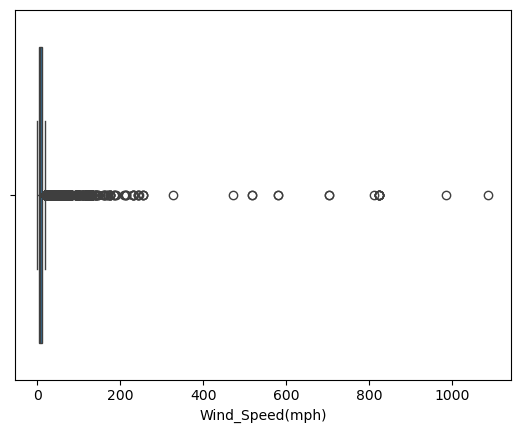

6274606    1087.0
7092904     984.0
114580      822.8
114588      822.8
114633      822.8
114640      822.8
114647      822.8
3414544     822.8
3414554     822.8
5742141     812.0
2638811     703.1
2638812     703.1
3144938     580.0
3144960     580.0
7184664     518.0
7184675     518.0
3570459     471.8
3104760     328.0
1739101     255.0
2791822     254.3
2791855     254.3
7597302     245.1
887089      243.0
6223828     243.0
64265       241.7
6965534     232.0
1696997     230.0
1697006     230.0
1697009     230.0
1697011     230.0
Name: Wind_Speed(mph), dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's take a look at Wind Speed, because its got 500K missing samples, and we might want to impute data here
print(df_numeric.loc[df_numeric['Wind_Speed(mph)'].idxmax()])

# As we see from print statement above, there is obviously at least on outlier 
# (>1K mph wind speed, probably incorrect data entry) that we need to work on
sns.boxplot(x=df_numeric['Wind_Speed(mph)'])
plt.show()

# Plot shows some very extreme values (probably not real), so lets find a max threshold to drop samples
print(df['Wind_Speed(mph)'].nlargest(30))

In [9]:
# For the 'Precipitation' column, we will assume the missing data is supposed to be 0
df_numeric['Precipitation(in)'] = df_numeric['Precipitation(in)'].fillna(0)
df_numeric.isna().sum()



# Thoughts on other columns, regarding our crash severity prediction:
# End_lat: can be dropped (not relevant)
# End_lng: can be dropped (not relevant)
# Temperature: can drop NA rows (100K samples out of 7M)
# Wind_Chill: lets drop the column, since there are a considerable # of missing sample values, and its probably related to Temp
# Humidity %: ranges all values from 0 to 100, only 174K missing samples, so lets drop

# Lets drop the 'End_Lat' and 'End_Lng' cols
df_numeric = df_numeric.drop(['Start_Lat','Start_Lng','End_Lat', 'End_Lng', 'Wind_Chill(F)'], axis=1)
df_numeric = df_numeric.dropna(subset=['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)'])

# We need to work on wind speed, because there are some obvious outliers. (Dropping above 255 because thats right at the edge of possibility, although probably also inaccurate)
df_numeric = df_numeric[df_numeric['Wind_Speed(mph)'] <= 255]



In [10]:
# Lets confirm we removed all missing values
print("# of rows after dropping missing values:", len(df_numeric))
na_counts = df_numeric.isna().sum()
print(na_counts)

# of rows after dropping missing values: 7095671
Severity             0
Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64


In [11]:
df_numeric.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
2,2,0.01,36.0,100.0,29.67,10.0,3.5,0.00
3,3,0.01,35.1,96.0,29.64,9.0,4.6,0.00
4,2,0.01,36.0,89.0,29.65,6.0,3.5,0.00
5,3,0.01,37.9,97.0,29.63,7.0,3.5,0.03
6,2,0.00,34.0,100.0,29.66,7.0,3.5,0.00


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=8)
principal_components = pca.fit_transform(df_numeric_scaled)
explained_var = pca.explained_variance_ratio_
cum_explained = explained_var.cumsum()

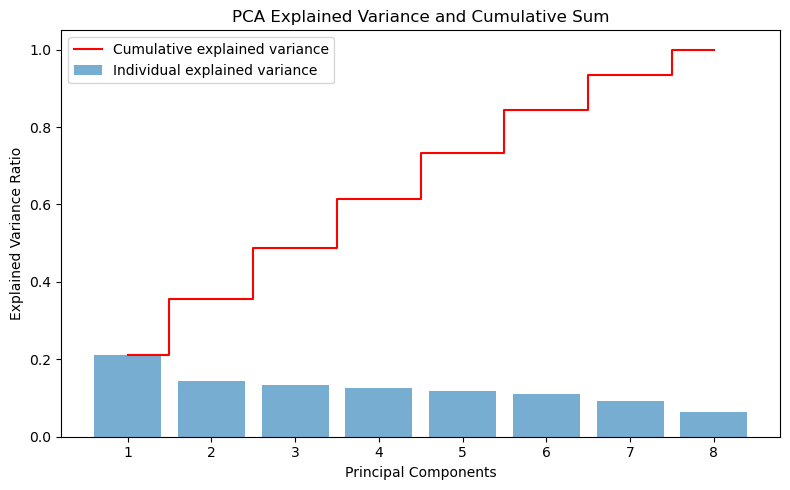

In [18]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cum_explained)+1), cum_explained, where='mid', color='red', label='Cumulative explained variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance and Cumulative Sum')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Goal: Predict crash severity

### Make feature and target matrices

In [31]:
y = df_numeric['Severity'] # the target column
X = df_numeric.drop('Severity', axis=1)  # all other columns as features

### Make test/train splits

In [42]:
from sklearn.model_selection import train_test_split

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,       # 20% for testing, 80% for training
    random_state=42     # ensures reproducibility
)

### Train a linear regression model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 0.2305425413658388
R^2: 0.004910367222785816


In [45]:
print("Intercept (constant):", model.intercept_)
print("Coefficients:\n", pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))

Intercept (constant): 1.621708552456529
Coefficients:
                    Coefficient
Distance(mi)          0.009690
Temperature(F)       -0.000478
Humidity(%)           0.000322
Pressure(in)          0.018268
Visibility(mi)        0.001481
Wind_Speed(mph)       0.004052
Precipitation(in)     0.059844


Well, coefficients are small, so that's good... But the model sucks at predicting crash severity currently. We'll have to incorporate more values and improve our results.

In [51]:
# The results of this regression are not appropriate for this categorical target (1, 2, 3) crash severity
print(y_pred)

[2.19674224 2.17721934 2.17691371 ... 2.28247539 2.21359347 2.15703313]


In [53]:
# Lets round the regression answers to the closest int (very crude, inaccurate)
y_pred_rounded = np.round(y_pred)

mse = mean_squared_error(y_test, y_pred_rounded)
r2 = r2_score(y_test, y_pred_rounded)

print("MSE:", mse)
print("R^2:", r2)

MSE: 0.2728168919799737
R^2: -0.17755820356372531


In [ ]:
# Correlation matrix
# TODO

In [ ]:
# VIF (Variance Inflation Factor)
# Should be below 5 or 10
# TODO

In [1]:
# P-value
# Should be below .05
# TODO

### Train a logistic regression model

In [2]:
# Predicting a binary outcome, based on probability derived by finding a value between -1 and 1